In [9]:
from pandas import read_csv, DataFrame, Series, Index, Period
from matplotlib.pyplot import figure, show, subplots, tight_layout, savefig
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from dslabs_functions import plot_line_chart, HEIGHT


Nr. Records =  199
First timestamp 2020-01-06 00:00:00
Last timestamp 2023-10-23 00:00:00


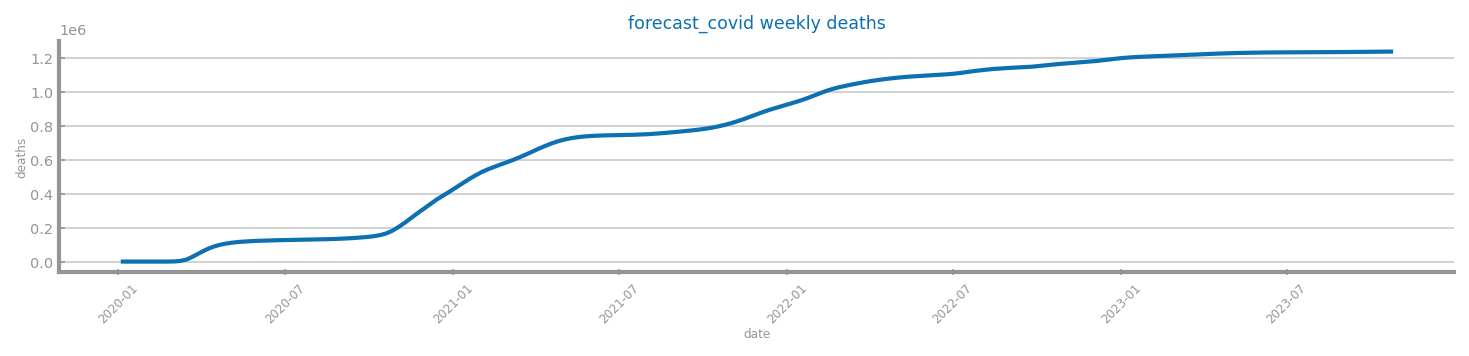

In [10]:
file_tag = "forecast_covid"
target = "deaths"
data: DataFrame = read_csv(
    "datasets/forecast_covid_single.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]
print("Nr. Records = ", series.shape[0])
print("First timestamp", series.index[0])
print("Last timestamp", series.index[-1])

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

In [11]:
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    df.index.drop_duplicates()
    df.index = df.index.to_timestamp()

    return df

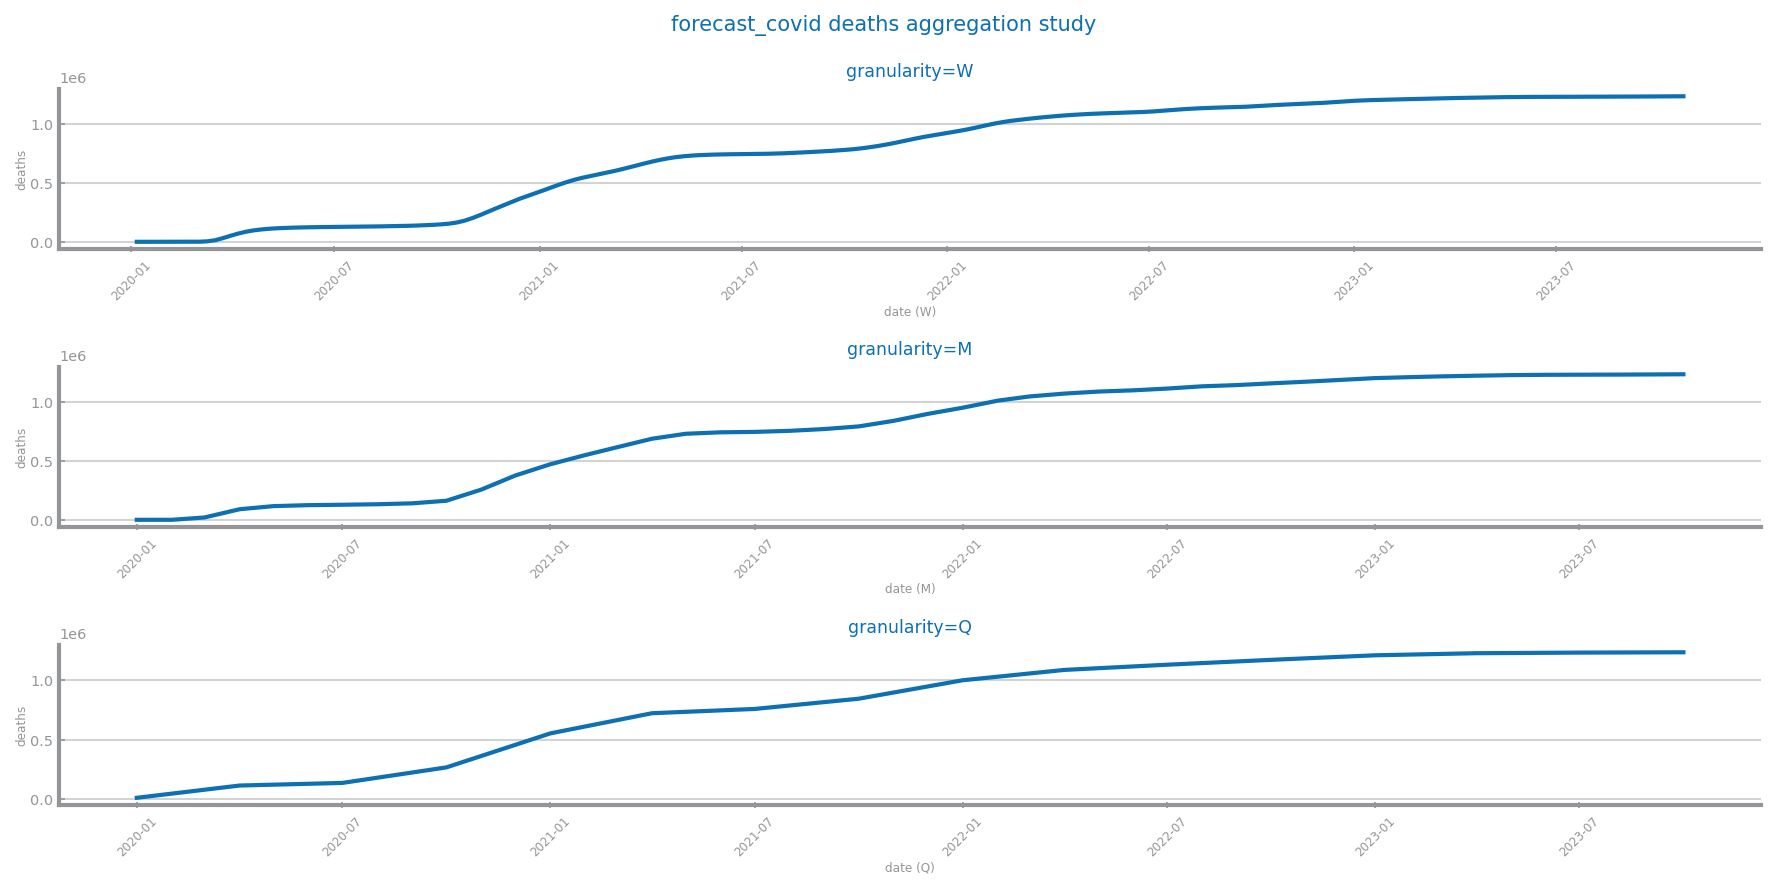

In [12]:
grans: list[str] = ["W", "M", "Q"]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )
    tight_layout()
    

savefig(f"images/forecast/{file_tag}_data_analysis_granularity", bbox_inches="tight")
show()